# RFM Analysis

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
user_transactions = pd.read_pickle('cleaned_user_transactions.pkl')

In [80]:
RFM_transactions = user_transactions[['MostRecentTransaction', 'TotalTransactions', 'TotalMonetary']]

In [81]:
RFM_transactions

,MostRecentTransaction,TotalTransactions,TotalMonetary
UserId,,,
259266.0,2018-04-01 06:17:00,2,0.00
259287.0,2028-02-18 10:57:00,7,35759.40
259308.0,2018-12-07 09:13:00,4,11982.24
259329.0,2019-02-02 05:51:00,1,12087.84
259350.0,2018-04-16 12:01:00,1,2443.20
...,...,...,...
383880.0,2018-05-19 05:52:00,1,1497.30
383901.0,2018-08-24 06:53:00,1,669.60
383922.0,2019-02-13 07:43:00,3,1466.10


In [82]:
import datetime

In [83]:
RFM_transactions['Recency'] = datetime.datetime.now() - RFM_transactions['MostRecentTransaction'] 

/run/media/realsidg/Dev/anaconda3/envs/yolov3-tf2-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
#Removing transactions with future date
RFM_transactions = RFM_transactions.drop(RFM_transactions[RFM_transactions.MostRecentTransaction > datetime.datetime.now()].index)
RFM_transactions

,MostRecentTransaction,TotalTransactions,TotalMonetary,Recency
UserId,,,,
259266.0,2018-04-01 06:17:00,2,0.00,807 days 11:03:49.553095
259308.0,2018-12-07 09:13:00,4,11982.24,557 days 08:07:49.553095
259329.0,2019-02-02 05:51:00,1,12087.84,500 days 11:29:49.553095
259350.0,2018-04-16 12:01:00,1,2443.20,792 days 05:19:49.553095
259392.0,2019-01-15 10:37:00,8,10494.24,518 days 06:43:49.553095
...,...,...,...,...
383880.0,2018-05-19 05:52:00,1,1497.30,759 days 11:28:49.553095
383901.0,2018-08-24 06:53:00,1,669.60,662 days 10:27:49.553095
383922.0,2019-02-13 07:43:00,3,1466.10,489 days 09:37:49.553095


In [85]:
RFM_transactions['Recency'] = RFM_transactions['Recency'].astype('timedelta64').astype(int).astype(float)

In [86]:
RFM_transactions

,MostRecentTransaction,TotalTransactions,TotalMonetary,Recency
UserId,,,,
259266.0,2018-04-01 06:17:00,2,0.00,6.976463e+16
259308.0,2018-12-07 09:13:00,4,11982.24,4.815407e+16
259329.0,2019-02-02 05:51:00,1,12087.84,4.324139e+16
259350.0,2018-04-16 12:01:00,1,2443.20,6.844799e+16
259392.0,2019-01-15 10:37:00,8,10494.24,4.477943e+16
...,...,...,...,...
383880.0,2018-05-19 05:52:00,1,1497.30,6.561893e+16
383901.0,2018-08-24 06:53:00,1,669.60,5.723447e+16
383922.0,2019-02-13 07:43:00,3,1466.10,4.228427e+16


In [87]:
r_labels = range(4, 0, -1)
f_labels = range(1, 4)
r_groups = pd.qcut(RFM_transactions['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(RFM_transactions['TotalTransactions'], q=4, labels=f_labels, duplicates='drop')

RFM_transactions = RFM_transactions.assign(R = r_groups.values, F = f_groups.values)
RFM_transactions.head()

,MostRecentTransaction,TotalTransactions,TotalMonetary,Recency,R,F
UserId,,,,,,
259266.0,2018-04-01 06:17:00,2,0.00,6.976463e+16,1,1
259308.0,2018-12-07 09:13:00,4,11982.24,4.815407e+16,2,2
259329.0,2019-02-02 05:51:00,1,12087.84,4.324139e+16,3,1
259350.0,2018-04-16 12:01:00,1,2443.20,6.844799e+16,1,1
259392.0,2019-01-15 10:37:00,8,10494.24,4.477943e+16,3,3


In [88]:
m_labels = range(1, 5)
m_groups = pd.qcut(RFM_transactions['TotalMonetary'], q=4, labels=m_labels)
RFM_transactions = RFM_transactions.assign(M = m_groups.values)

In [89]:
RFM_transactions

,MostRecentTransaction,TotalTransactions,TotalMonetary,Recency,R,F,M
UserId,,,,,,,
259266.0,2018-04-01 06:17:00,2,0.00,6.976463e+16,1,1,1
259308.0,2018-12-07 09:13:00,4,11982.24,4.815407e+16,2,2,3
259329.0,2019-02-02 05:51:00,1,12087.84,4.324139e+16,3,1,3
259350.0,2018-04-16 12:01:00,1,2443.20,6.844799e+16,1,1,2
259392.0,2019-01-15 10:37:00,8,10494.24,4.477943e+16,3,3,3
...,...,...,...,...,...,...,...
383880.0,2018-05-19 05:52:00,1,1497.30,6.561893e+16,1,1,1
383901.0,2018-08-24 06:53:00,1,669.60,5.723447e+16,1,1,1
383922.0,2019-02-13 07:43:00,3,1466.10,4.228427e+16,4,1,1


In [90]:
RFM_transactions['FplusM'] = RFM_transactions['F'].astype('int') + RFM_transactions['M'].astype('int')

In [91]:
RFM_transactions

,MostRecentTransaction,TotalTransactions,TotalMonetary,Recency,R,F,M,FplusM
UserId,,,,,,,,
259266.0,2018-04-01 06:17:00,2,0.00,6.976463e+16,1,1,1,2
259308.0,2018-12-07 09:13:00,4,11982.24,4.815407e+16,2,2,3,5
259329.0,2019-02-02 05:51:00,1,12087.84,4.324139e+16,3,1,3,4
259350.0,2018-04-16 12:01:00,1,2443.20,6.844799e+16,1,1,2,3
259392.0,2019-01-15 10:37:00,8,10494.24,4.477943e+16,3,3,3,6
...,...,...,...,...,...,...,...,...
383880.0,2018-05-19 05:52:00,1,1497.30,6.561893e+16,1,1,1,2
383901.0,2018-08-24 06:53:00,1,669.60,5.723447e+16,1,1,1,2
383922.0,2019-02-13 07:43:00,3,1466.10,4.228427e+16,4,1,1,2


In [92]:
RFM_transactions['RFM_Score'] = RFM_transactions[['R','F','M']].sum(axis=1)
print(RFM_transactions['RFM_Score'].head())

UserId
259266.0    3.0
259308.0    7.0
259329.0    7.0
259350.0    4.0
259392.0    9.0
Name: RFM_Score, dtype: float64


In [93]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'# Create a new variable RFM_Level
    
RFM_transactions['RFM_Level'] = RFM_transactions.apply(rfm_level, axis=1)# Print the header with top 5 rows to the console
RFM_transactions

,MostRecentTransaction,TotalTransactions,TotalMonetary,Recency,R,F,M,FplusM,RFM_Score,RFM_Level
UserId,,,,,,,,,,
259266.0,2018-04-01 06:17:00,2,0.00,6.976463e+16,1,1,1,2,3.0,Require Activation
259308.0,2018-12-07 09:13:00,4,11982.24,4.815407e+16,2,2,3,5,7.0,Loyal
259329.0,2019-02-02 05:51:00,1,12087.84,4.324139e+16,3,1,3,4,7.0,Loyal
259350.0,2018-04-16 12:01:00,1,2443.20,6.844799e+16,1,1,2,3,4.0,Needs Attention
259392.0,2019-01-15 10:37:00,8,10494.24,4.477943e+16,3,3,3,6,9.0,Can't Loose Them
...,...,...,...,...,...,...,...,...,...,...
383880.0,2018-05-19 05:52:00,1,1497.30,6.561893e+16,1,1,1,2,3.0,Require Activation
383901.0,2018-08-24 06:53:00,1,669.60,5.723447e+16,1,1,1,2,3.0,Require Activation
383922.0,2019-02-13 07:43:00,3,1466.10,4.228427e+16,4,1,1,2,6.0,Potential


In [107]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = RFM_transactions.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'TotalTransactions': 'mean',
    'TotalMonetary': ['mean', 'count']
}).round(1)# Print the aggregated dataset
print(rfm_level_agg)

                         Recency TotalTransactions TotalMonetary      
                            mean              mean          mean count
RFM_Level                                                             
Can't Loose Them    4.327871e+16              11.7       38826.0  1176
Champions           4.534350e+16               4.6       11434.6   393
Loyal               4.603028e+16               3.0        9274.6   426
Needs Attention     5.712434e+16               1.5        2571.1   590
Potential           4.720663e+16               2.2      142558.8   594
Promising           4.990659e+16               1.7        3623.0   604
Require Activation  6.428391e+16               1.3        1216.0   511


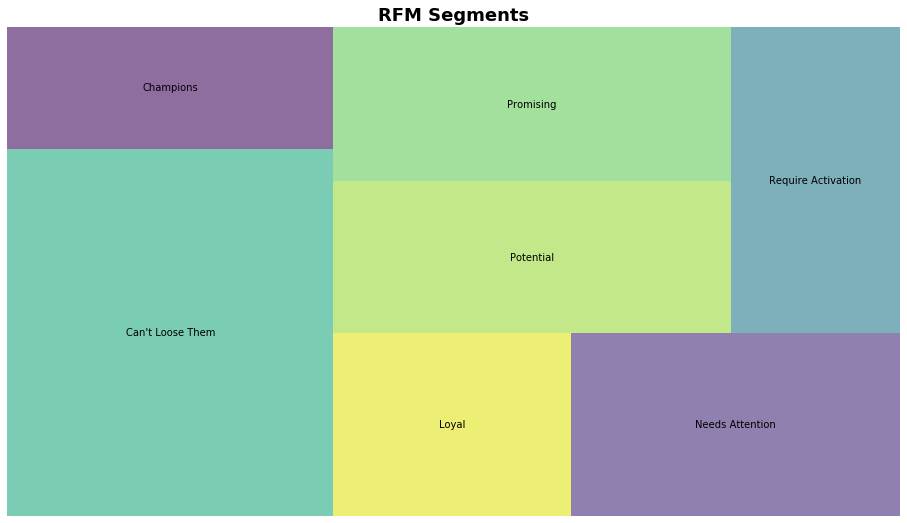

In [108]:
import squarify

rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()